In [1]:
import os
import numpy as np #
import tensorflow as tf #library untuk ML
from google.colab import files #kelola files di gclb
from tensorflow.keras import layers #untukk membuat layer pada model
from keras.preprocessing import image #untuk proses/preproces gambar/img
from tensorflow.keras.models import Sequential #untuk panggil sequentiallny
from tensorflow.keras.applications import ResNet50 #panggil model pre-train yaitu resnet50
from tensorflow.keras.layers import Flatten, Dense, Dropout #impor ketiga fungsi untuk bikin layerny
from tensorflow.keras.preprocessing.image import ImageDataGenerator #

In [2]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [3]:
train_dir = '/content/drive/MyDrive/Colab Notebooks/asik_ai/data baruu/train'
validation_dir = '/content/drive/MyDrive/Colab Notebooks/asik_ai/data baruu/validation'
test_dir = '/content/drive/MyDrive/Colab Notebooks/asik_ai/data baruu/test'

In [4]:
datagen = ImageDataGenerator( #objek untuk batch gmbar
    rescale=1./255) # normalisasi piksel gambar jadi 255 default aja

In [5]:
#latih
train_generator = datagen.flow_from_directory( #panggil objek sblmnya, utk membaca gambar dan menghasilkan batcth
        train_dir, #data
        target_size=(128, 128), #ukuran gambarny
        batch_size=140, #jumlah gambar dalam setiap batchnya
        class_mode='categorical')#0 dan 1

Found 675 images belonging to 2 classes.


In [6]:
#data validasi
validation_generator = datagen.flow_from_directory(# fungsinya untuk membaca gambar dri direktori
    validation_dir, #data
    target_size=(128,128),
    batch_size=32,
    class_mode='categorical')#bagian validasi dari data

Found 186 images belonging to 2 classes.


In [7]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 62 images belonging to 2 classes.


In [8]:
# model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Unfreeze Bobot Model
for layer in base_model.layers:
    layer.trainable = True

model = Sequential()

model.add(base_model)

model.add(Flatten())
model.add(Dropout(0.3))  # Menambahkan Dropout Layer

model.add(Dense(64, activation='relu'))  # Mengurangi jumlah unit pada layer Dense
model.add(Dropout(0.5))  # Menambahkan Dropout Layer

model.add(Dense(2, activation='softmax'))

# Penyesuaian Learning Rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


94765736/94765736 [==============================] - 0s 0us/step


In [9]:
model.summary() #ringkasan model

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dropout (Dropout)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 64)                2097216   
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 25685058 (97.98 MB)
Trainable params: 2563

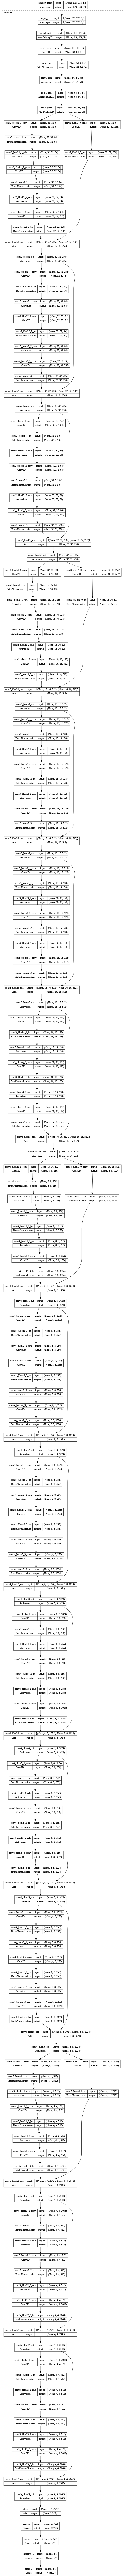

In [10]:
model_viz = tf.keras.utils.plot_model(model, #visualisasi dari model resnet05
                          to_file='model.png',
                          show_shapes=True,
                          show_layer_names=True,
                          rankdir='TB',
                          expand_nested=True,
                          dpi=55)
model_viz

In [11]:
from tensorflow.keras.callbacks import EarlyStopping

# Gunakan early stopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Melatih model dengan data dari train generator dan menggunakan early stopping
history = model.fit(train_generator, validation_data=validation_generator, epochs=15, callbacks=[early_stopping])


Epoch 1/15
5/5 [==============================] - 109s 13s/step - loss: 1.5501 - accuracy: 0.5200 - val_loss: 0.6820 - val_accuracy: 0.5484
Epoch 2/15
5/5 [==============================] - 3s 594ms/step - loss: 0.5327 - accuracy: 0.8104 - val_loss: 0.6895 - val_accuracy: 0.5484
Epoch 3/15
5/5 [==============================] - 4s 683ms/step - loss: 0.3567 - accuracy: 0.8652 - val_loss: 0.6887 - val_accuracy: 0.5484
Epoch 4/15
5/5 [==============================] - 3s 560ms/step - loss: 0.2901 - accuracy: 0.8889 - val_loss: 0.6960 - val_accuracy: 0.5484
Epoch 5/15
5/5 [==============================] - 3s 566ms/step - loss: 0.1903 - accuracy: 0.9185 - val_loss: 0.7005 - val_accuracy: 0.5484
Epoch 6/15
5/5 [==============================] - 3s 668ms/step - loss: 0.1691 - accuracy: 0.9363 - val_loss: 0.6960 - val_accuracy: 0.5484


In [12]:
# Fine TUning
# Model ResNet50
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Unfreeze beberapa layer teratas
for layer in base_model.layers[:-4]:
    layer.trainable = False

# Membangun model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Penyesuaian Learning Rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.00001)  # Menggunakan tingkat pembelajaran yang sangat kecil
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Menampilkan ringkasan model
model.summary()

# Melatih model dengan data dari train generator dan menggunakan early stopping
history_fine_tune = model.fit(train_generator, validation_data=validation_generator, epochs=10, callbacks=[early_stopping])


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 4, 4, 2048)        23587712  
                                                                 
 flatten_1 (Flatten)         (None, 32768)             0         
                                                                 
 dropout_2 (Dropout)         (None, 32768)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                2097216   
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 25685058 (97.98 MB)
Trainable params: 31

2/2 [==============================] - 8s 7s/step


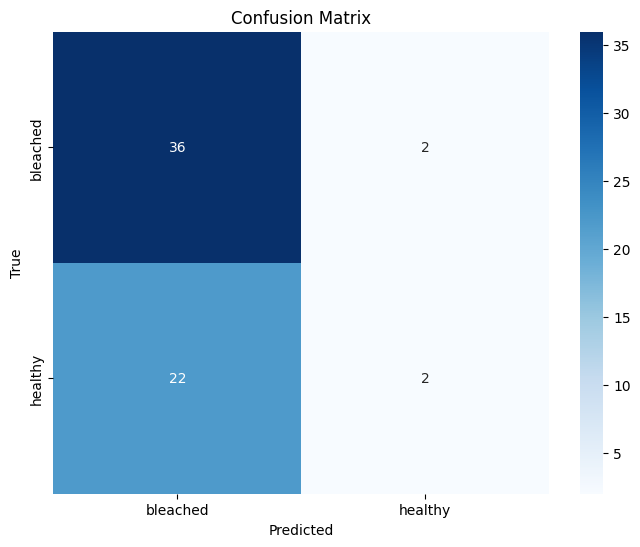

Classification Report:
               precision    recall  f1-score   support

    bleached       0.62      0.95      0.75        38
     healthy       0.50      0.08      0.14        24

    accuracy                           0.61        62
   macro avg       0.56      0.52      0.45        62
weighted avg       0.57      0.61      0.51        62



In [13]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi menggunakan model pada data uji
test_generator.reset()  # Reset generator untuk memastikan dimulai dari awal
predictions = model.predict(test_generator)

# Konversi prediksi dari one-hot encoding menjadi kelas tunggal
predicted_classes = np.argmax(predictions, axis=1)

# Ambil label sebenarnya dari data uji
true_classes = test_generator.classes

# Dapatkan nama kelas (Bleached dan Healthy)
class_labels = list(test_generator.class_indices.keys())

# Hitung confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Plot confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Tampilkan laporan klasifikasi
print("Classification Report:\n", classification_report(true_classes, predicted_classes, target_names=class_labels))


In [14]:
# Simpan model ke dalam file h5
model.save('/content/drive/MyDrive/Colab Notebooks/asik_ai/karang_resnet50_model.h5')

# Output jika model berhasil disimpan
print("Model berhasil disimpan sebagai 'karang_resnet50_model.h5'")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model berhasil disimpan sebagai 'karang_resnet50_model.h5'
